In [1]:
import numpy as np
import matplotlib.pyplot as plt

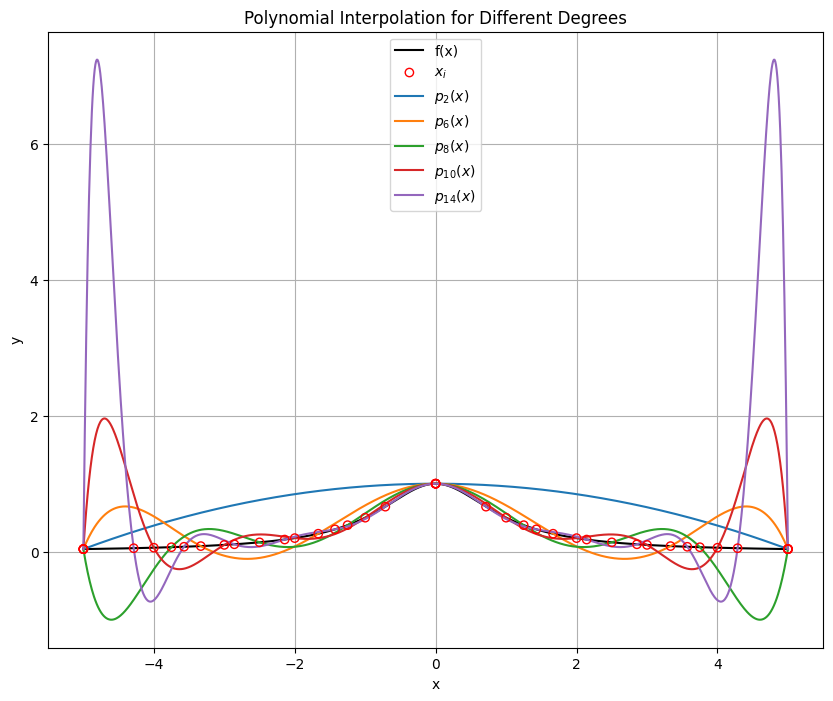

In [2]:
def f(x):
    """The function to interpolate."""
    return 1 / (1 + x**2)

def vandermonde_matrix(x_values, n=None):
    """Create a Vandermonde matrix for a given set of x values."""
    n = n or len(x_values)
    A = np.zeros((len(x_values), n))
    for i in range(n):
        A[:, i] = x_values ** i
    return A

def polynomial_interpolation_with_inverse(x_points, y_points):
    """Perform polynomial interpolation using the inverse of the Vandermonde matrix."""
    A = vandermonde_matrix(x_points)
    A_inv = np.linalg.inv(A)
    c = np.dot(A_inv, y_points)
    return c

def evaluate_polynomial(x_values, coefficients):
    """Evaluate the polynomial interpolation at given x values."""
    A_tilda = vandermonde_matrix(x_values, len(coefficients))
    y_tilda = np.dot(A_tilda, coefficients)
    return y_tilda

# Define the range for x and set of degrees for interpolation
x_range = np.linspace(-5, 5, 1000)
n_values = [2, 6, 8, 10, 14]

# Plot the original function
plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')

# Perform interpolations for different degrees and plot
for i, n in enumerate(n_values):
    x_points = np.linspace(-5, 5, n+1)
    y_points = f(x_points)
    c = polynomial_interpolation_with_inverse(x_points, y_points)
    y_tilda = evaluate_polynomial(x_range, c)
    # Plot points only once in the legend
    if i == 0:
        plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5, label='$x_i$')
    else:
        plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5)
    plt.plot(x_range, y_tilda, label=rf'$p_{{{n}}}(x)$')
    

plt.legend()
plt.title('Polynomial Interpolation for Different Degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



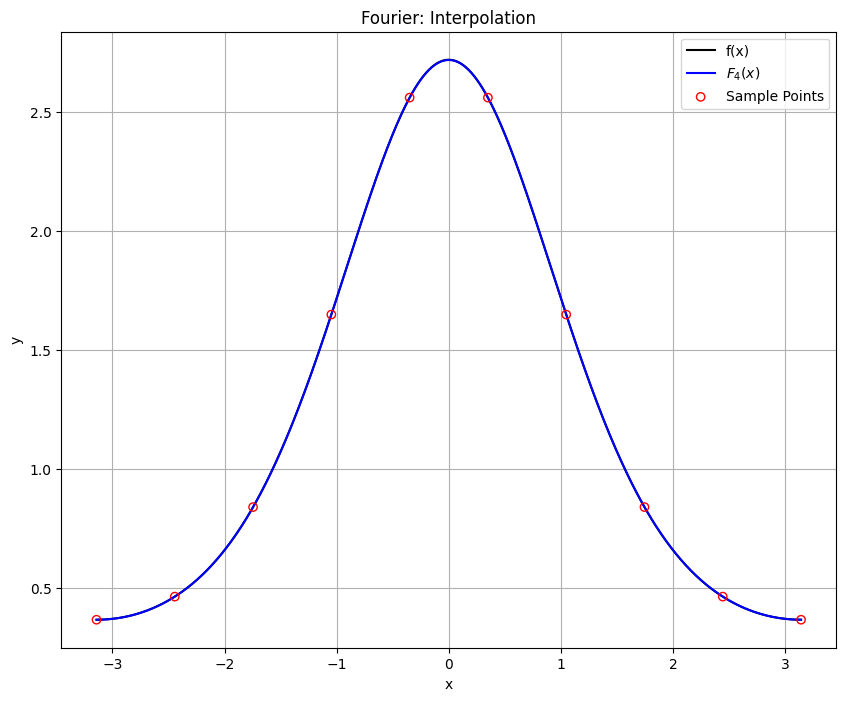

In [3]:
# Function to compute e^cos(x)
def f(x):
    return np.exp(np.cos(x))

# Function to construct a matrix resembling a Vandermonde matrix for Fourier series approximation
def pseudo_vandermonde(x_values, N=None, tilda_switch=False):
    # If N is not specified, it defaults to the number of x_values
    N = N or len(x_values)
    n = int((N - 2) / 2)
    A = np.zeros((len(x_values) - 1, N - 1))
    
    # Adjust the first column depending on the tilda_switch
    if tilda_switch:
        A[:, 0] = np.ones_like(x_values[:-1])
    else:
        A[:, 0] = np.ones_like(x_values[:-1]) / 2

    # Populate the matrix with cosine and sine terms
    for j in range(1, n + 1):
        A[:, j] = np.cos(j * x_values[:-1])
    for j in range(n + 1, N - 1):
        A[:, j] = np.sin((j - n) * x_values[:-1])
    
    return A
    
# Function to evaluate the Fourier series at given x values
def evaluate_Fourier(x_values, coefficients):
    # Extend x_values to include zero and create a corresponding pseudo-Vandermonde matrix
    A_tilda = pseudo_vandermonde(np.append(x_values, 0), len(coefficients) + 1)
    # Compute the polynomial values using the coefficients
    y_tilda = np.dot(A_tilda, coefficients)
    return y_tilda   

# Set the range for x values
x_range = np.linspace(-np.pi, np.pi, 1001)

# Set the number of points for the Fourier series approximation
N = 10
n = int((N - 2) / 2)

# Create equispaced x points and compute their function values
x_points = np.linspace(-np.pi, np.pi, N)
y_points = f(x_points)

# Exclude the last value for the Fourier series calculation (periodicity assumption)
f_vec = f(x_points)[:-1]

# Create the pseudo-Vandermonde matrix for the given x points
A = pseudo_vandermonde(x_points)

# Solve the linear system to find the Fourier coefficients
c = np.linalg.solve(A, f_vec)

# Evaluate the Fourier series using the coefficients
y_tilda = evaluate_Fourier(x_range, c)

# Calculate the maximum error for the interpolation
error_interpolation = np.linalg.norm(y_tilda - f(x_range), np.inf)

# Plot the original function and its Fourier series approximation for interpolation
plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')
plt.plot(x_range, y_tilda, label=rf'$F_{{{n}}}(x)$', color='blue')
plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5, label='Sample Points')
plt.legend()
plt.title('Fourier: Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

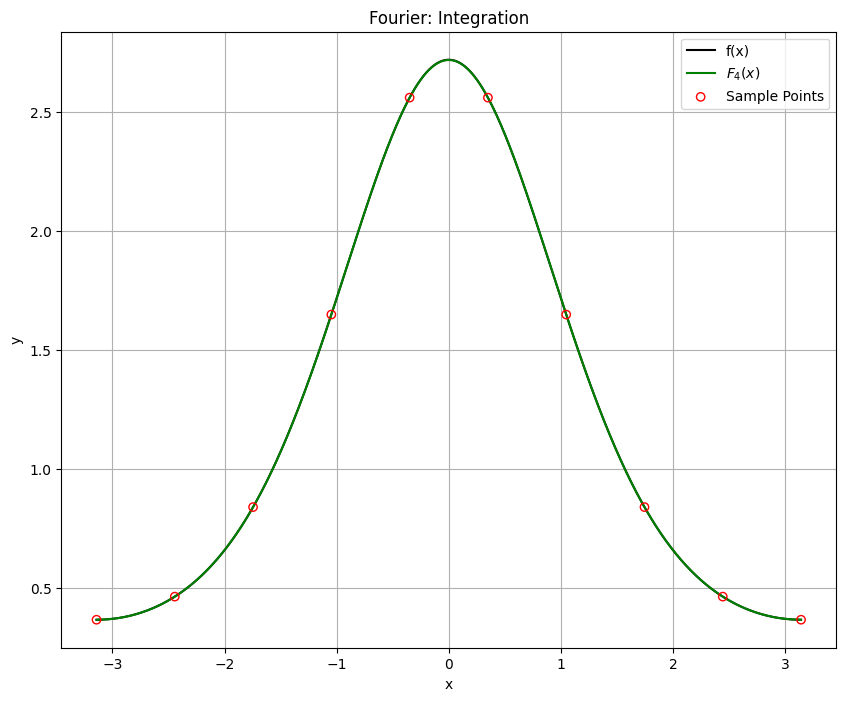

In [4]:
# Create the pseudo-Vandermonde matrix with the tilda_switch set for integration
A_tilda = pseudo_vandermonde(x_points, tilda_switch=True)
A_tilda_transpose = A_tilda.T

# Compute the Fourier coefficients using the matrix and trapezoidal rule for integration
c = 2 / (N - 1) * np.dot(A_tilda_transpose, f_vec)

# Evaluate the Fourier series with the integration coefficients
y_tilda = evaluate_Fourier(x_range, c)

# Calculate the maximum error for the integration
error_integration = np.linalg.norm(y_tilda - f(x_range), np.inf)

# Plot the original function and its Fourier series approximation for integration
plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')
plt.plot(x_range, y_tilda, label=rf'$F_{{{n}}}(x)$', color='green')
plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5, label='Sample Points')
plt.legend()
plt.title('Fourier: Integration')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



In [5]:
# Print the maximum errors for interpolation and integration
print("Error in Interpolation: ", error_interpolation)
print("Error in Integration: ", error_integration)

Error in Interpolation:  0.0011826257944629326
Error in Integration:  0.0011826257944629326
